In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [338]:
vaccine_date = pd.read_csv("/Users/mengtonghu/Downloads/Vaccine_state_10112021.csv")
recovery_county = pd.read_csv("/Users/mengtonghu/Downloads/Recovery_county_101121.csv")
death_county = pd.read_csv("/Users/mengtonghu/Downloads/Death_county_101221.csv")
confirmed_county = pd.read_csv("/Users/mengtonghu/Downloads/Confirmed_county_101221.csv")

In [339]:
recovery_county[recovery_county['State'] == "MI"]

,State,County,fips,X2021-07-13,X2021-07-14,X2021-07-15,X2021-07-16,X2021-07-17,X2021-07-18,X2021-07-19,...,X2021-10-02,X2021-10-03,X2021-10-04,X2021-10-05,X2021-10-06,X2021-10-07,X2021-10-08,X2021-10-09,X2021-10-10,X2021-10-11
125,MI,Barry,26015,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
126,MI,Eaton,26045,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
127,MI,Washtenaw,26161,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
307,MI,Unassigned,0,72279,72279,72279,72279,72279,72279,72279,...,164968,164968,164968,164968,164968,164968,197449,197449,197449,197449
497,MI,Ingham,26065,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
766,MI,Ottawa,26139,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103


In [340]:
vaccine_date

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11
0,84000001.0,US,USA,840.0,1.0,NaN,Alabama,US,32.3182,-86.9023,...,4544355,4565230,4579477,4584378,4594736,4604007,4624892,4630089,4630089,4630089
1,84000002.0,US,USA,840.0,2.0,NaN,Alaska,US,61.3707,-152.4044,...,798038,798055,803283,804032,805975,807903,810238,812327,812327,812327
2,84000004.0,US,USA,840.0,4.0,NaN,Arizona,US,33.7298,-111.4312,...,8243182,8278599,8301993,8315638,8327793,8343353,8370474,8393061,8393061,8393061
3,84000005.0,US,USA,840.0,5.0,NaN,Arkansas,US,34.9697,-92.3731,...,3037532,3049839,3055319,3057792,3066728,3074757,3085323,3092442,3092442,3092442
4,84000006.0,US,USA,840.0,6.0,NaN,California,US,36.1162,-119.6816,...,50863031,51087971,51173040,51250507,51335279,51458972,51583481,51722146,51722146,51722146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NaN,NaN,NaN,NaN,NaN,NaN,Department of Defense,US,NaN,NaN,...,5757605,5757605,5757605,5757605,5757605,5757605,5757605,5757847,5757847,5757847
57,NaN,NaN,NaN,NaN,NaN,NaN,Federal Bureau of Prisons,US,NaN,NaN,...,229157,229157,229158,229479,229685,230489,231428,232118,232118,232118
58,NaN,NaN,NaN,NaN,NaN,NaN,Indian Health Services,US,NaN,NaN,...,1649627,1652911,1653703,1655095,1659119,1662797,1667794,1671369,1671369,1671369
59,NaN,NaN,NaN,NaN,NaN,NaN,Long Term Care (LTC) Program,US,NaN,NaN,...,7973938,7974053,7974073,7979376,8017821,8022049,8022049,8022049,8022049,8022049


In [341]:
Michigan_pop = int(vaccine_date[vaccine_date['Province_State'] == "Michigan"]['Population'].sum())

In [342]:
vaccine_date_1 = vaccine_date[vaccine_date['Province_State'] == "Michigan"]
recovery_county_1 = recovery_county[recovery_county['State'] == "MI"]
death_county_1 = death_county[death_county['Province_State'] == "Michigan"]
confirmed_county_1 = confirmed_county[confirmed_county['Province_State'] == "Michigan"]

In [343]:
recovery_county_1 = recovery_county_1.groupby('State').sum()
death_county_1 = death_county_1.groupby('Province_State').sum()
confirmed_county_1 = confirmed_county_1.groupby('Province_State').sum()

In [344]:
vaccine_date_1.iloc[0,0:20]

UID                 84000026.0
iso2                        US
iso3                       USA
code3                    840.0
FIPS                      26.0
Admin2                     NaN
Province_State        Michigan
Country_Region              US
Lat                    43.3266
Long_                 -84.5361
Combined_Key      Michigan, US
Population           9986857.0
2020-12-14                 NaN
2020-12-15                10.0
2020-12-16               352.0
2020-12-17              1097.0
2020-12-18              2847.0
2020-12-19              9781.0
2020-12-20             12430.0
2020-12-21             13321.0
Name: 22, dtype: object

In [345]:
np.where(confirmed_county_1.columns.values=="6/25/21")

(array([525]),)

In [346]:
np.where(vaccine_date_1.columns.values=="2021-06-25")


(array([205]),)

In [347]:
np.where(death_county_1.columns.values == "6/25/21")

(array([526]),)

In [348]:
#vaccine_date_1 = vaccine_date_1.iloc[:,205:(vaccine_date_1.shape[1]+1)]
#confirmed_county_1 = confirmed_county_1.iloc[:,525:(confirmed_county_1.shape[1]+1)]
#death_county_1 = death_county_1.iloc[:,526:(death_county_1.shape[1]+1)]
death_county_1 = death_county_1.iloc[:,6:(death_county_1.shape[1]+1)]
confirmed_county_1 = confirmed_county_1.iloc[:,5:(confirmed_county_1.shape[1]+1)]
vaccine_date_1 = vaccine_date_1.iloc[:,13:(vaccine_date_1.shape[1]+1)]

In [349]:
#from 2021-06-25
recovery_county_1 = recovery_county_1.iloc[:,1:(recovery_county_1.shape[1]+1)]


In [350]:
vaccine_date_long = pd.melt(vaccine_date_1, var_name ='date', value_name='total vaccinated people')

In [351]:
vaccine_date_long['percent'] = vaccine_date_long['total vaccinated people'] / Michigan_pop
_ = pd.to_datetime(vaccine_date_long['date'])

In [352]:
recovery_county_long = pd.melt(recovery_county_1, var_name ='date', value_name='recovered')
death_county_long = pd.melt(death_county_1, var_name ='date', value_name='death')
confirmed_county_long = pd.melt(confirmed_county_1, var_name ='date', value_name='confirmed')


In [353]:
recovery_county_long['date'] = recovery_county_long['date'].str.slice(start=1)

In [354]:
confirmed_county_long

,date,confirmed
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
624,10/7/21,1178908
625,10/8/21,1189030
626,10/9/21,1189030
627,10/10/21,1189030


In [355]:
for data in [vaccine_date_long,recovery_county_long ]:
    data['date']= pd.to_datetime(data['date'],format = '%Y-%m-%d')

In [356]:

for data in [confirmed_county_long, death_county_long ]:
    data['date']= pd.to_datetime(data['date'],format = '%m/%d/%y')

In [357]:
merged = confirmed_county_long.merge(death_county_long,how='left', left_on='date',right_on ='date')
merged = merged.merge(recovery_county_long, on ='date', how = 'left')
merged = merged.merge(vaccine_date_long,how='left', left_on='date',right_on ='date')

In [358]:
weight = merged[merged['date'] == '2021-10-11']['percent']/0.68
merged['percent'] = merged['percent']/weight.values[0]

In [359]:
print('To re-weight the percent of vacinnation I divided, the percent of vaccination using ', weight.values[0])

To re-weight the percent of vacinnation I divided, the percent of vaccination using  1.607472995876127


In [360]:
merged[['confirmed_diff','death_diff','recovered_diff','percent_diff']] = merged[['confirmed','death','recovered','percent']].diff()

In [361]:
# fig0 = plt.figure(figsize=(15, 10))
# ax3 = fig0.add_subplot(4, 1, 4)
# ax0 = fig0.add_subplot(4, 1, 1,sharex = ax3)
# ax1 = fig0.add_subplot(4, 1, 2,sharex = ax3)
# ax2 = fig0.add_subplot(4, 1, 3,sharex = ax3)

# fig0.tight_layout() 
# ax0.plot (merged['recovered'])
# ax1.plot (merged['confirmed'])
# ax2.plot (merged['percent'])
# ax3.plot (merged['death'])
# _ = plt.setp(ax1.get_xticklabels(), visible=False)
# _ = plt.setp(ax2.get_xticklabels(), visible=False)
# _ = plt.setp(ax0.get_xticklabels(), visible=False)
# _ = plt.setp(ax3.get_xticklabels(),  rotation=45)
# _ = ax3.set_xticks(merged['date'][::2])
# _ = ax0.set_ylabel('Recovery')
# _ = ax1.set_ylabel('Confirmed')
# _ = ax2.set_ylabel('Vaccinated')
# _ = ax3.set_ylabel('Death')

In [362]:
merged = merged[merged['date'] >= '2020-11-30']

In [363]:
merged = merged[merged['date'] != '2021-10-11']

In [364]:
merged['date']

313   2020-11-30
314   2020-12-01
315   2020-12-02
316   2020-12-03
317   2020-12-04
         ...    
623   2021-10-06
624   2021-10-07
625   2021-10-08
626   2021-10-09
627   2021-10-10
Name: date, Length: 315, dtype: datetime64[ns]

In [375]:
vaccine_date_long.iloc[0:20,:]

,date,total vaccinated people,percent
0,2020-12-15,10.0,0.000001
1,2020-12-16,352.0,0.000035
2,2020-12-17,1097.0,0.000110
3,2020-12-18,2847.0,0.000285
4,2020-12-19,9781.0,0.000979
5,2020-12-20,12430.0,0.001245
6,2020-12-21,13321.0,0.001334
7,2020-12-22,26737.0,0.002677
8,2020-12-23,37660.0,0.003771
9,2020-12-24,52309.0,0.005238


In [365]:
merged_old = merged

In [379]:
merged = merged.resample('W-MON', label='left', closed = 'left', on='date').sum().reset_index().sort_values(by='date')

In [380]:
merged_old.drop(labels=['percent_diff','confirmed_diff'], axis=1,inplace=True)

In [381]:
diff = merged.resample('W-MON', label='left', closed = 'left', on='date')['percent_diff',"confirmed_diff"].sum().reset_index().sort_values(by='date')

In [382]:
merged_old[['total vaccinated people','confirmed']] = merged_old[['total vaccinated people','confirmed']].shift(1).values

In [383]:
merged = diff.merge(merged_old,how='left',left_on = 'date',right_on='date')

The weekly data by Mondays is grouped by daily data using the data in the past 7 days including the current day.

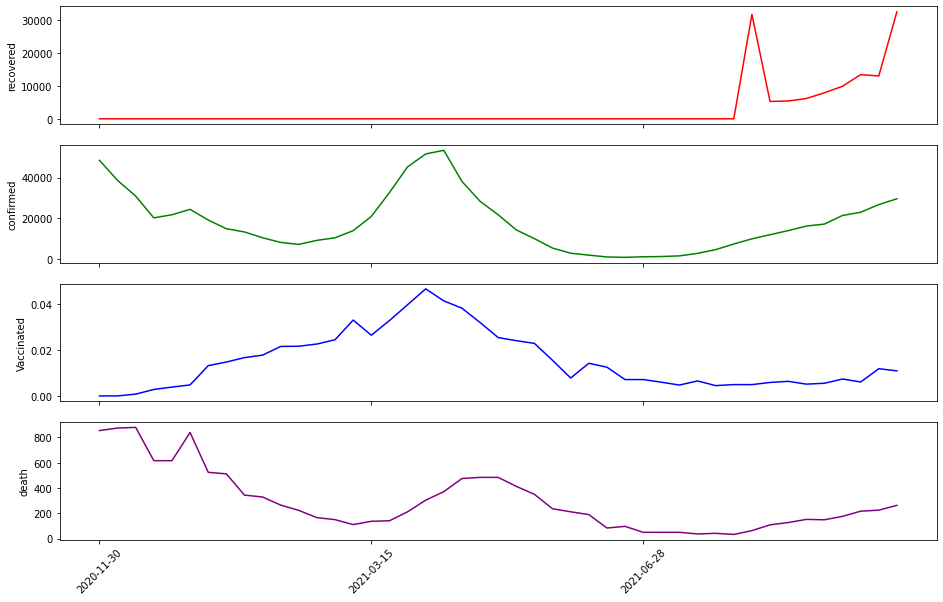

In [306]:
fig, axes = plt.subplots(figsize =(13, 8),nrows=4, ncols=1, sharex=True)
fig.tight_layout()
# axes.plot('confirmed','recovered','total vaccinated people','death', data=data)
_ = axes[0].plot(merged['date'],merged['recovered_diff'],color = 'red')
_ = axes[1].plot(merged['date'],merged['confirmed_diff'],color = 'green')
_ = axes[2].plot(merged['date'],merged['percent_diff'],color = 'blue')
_ = axes[3].plot(merged['date'],merged['death_diff'],color = 'purple')
for i, lab in enumerate(['recovered', 'confirmed', 'Vaccinated','death']):
    _ = axes[i].set_ylabel(lab)

# date_form = DateFormatter('%m-%d')
# axes[3].xaxis.set_major_formatter(date_form)
# # Ensure ticks fall once every other week (interval=2) 
# axes[3].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[3].tick_params(axis='x', rotation=45)
_ = axes[3].set_xticks(merged['date'][::15])
plt.savefig("./covid_plot.png")

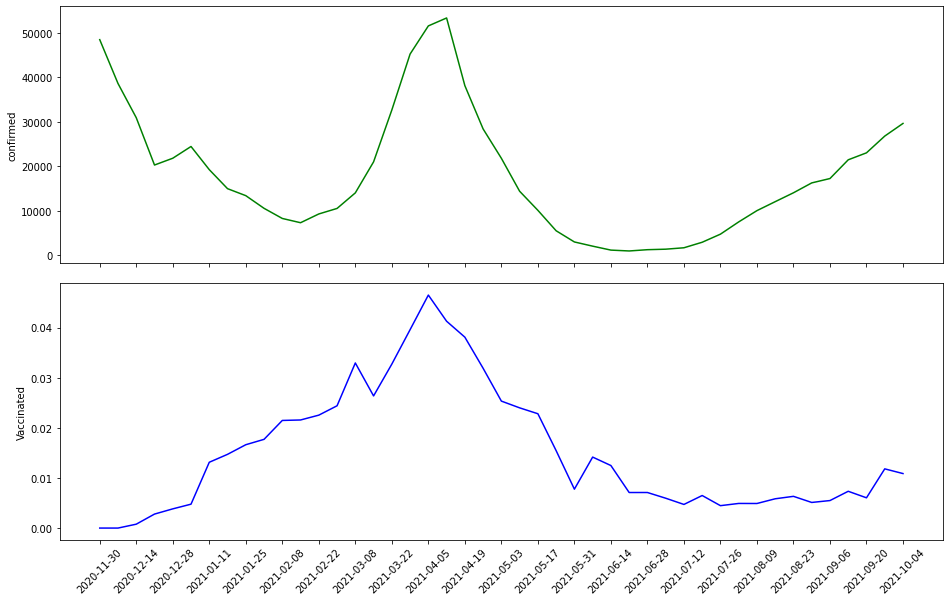

In [384]:
fig, axes = plt.subplots(figsize =(13, 8),nrows=2, ncols=1, sharex=True)
fig.tight_layout()
# axes.plot('confirmed','recovered','total vaccinated people','death', data=data)
#_ = axes[0].plot(merged['date'],merged['recovered_diff'],color = 'red')
_ = axes[0].plot(merged['date'],merged['confirmed_diff'],color = 'green')
_ = axes[1].plot(merged['date'],merged['percent_diff'],color = 'blue')
#_ = axes[3].plot(merged['date'],merged['death_diff'],color = 'purple')
for i, lab in enumerate(['confirmed', 'Vaccinated']):
    _ = axes[i].set_ylabel(lab)

# date_form = DateFormatter('%m-%d')
# axes[3].xaxis.set_major_formatter(date_form)
# # Ensure ticks fall once every other week (interval=2) 
# axes[3].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[1].tick_params(axis='x', rotation=45)
_ = axes[1].set_xticks(merged['date'][::2])
plt.savefig("./covid_plot.png")

In [385]:
merged.to_csv("./Merged_covid_Data_new.csv", index=False)

There is no daily data for Recovery cases. Thus it is hard to visualize its trend. There doesn't seem to be any 'accute' effect or lagged pattern 